TO DO exercise

In [27]:
#Create synthetic/dummy data
#first import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
#• Create synthetic/dummy data here I take Housing Prices Dataset as a refernce
ns = 100
house_size = np.random.normal(2000, 500, ns)
location = np.random.uniform(1, 10 , ns)#the higher means better location (near to 10)
house_age = np.random.exponential(15, ns)
#create target variable based on the features above
basePrice = 100000
size_effect = house_size * 120  
location_effect = location * 25000 
age_effect = house_age * 2000 
noise = np.random.normal(0, 30000, ns)  # Random noise Beacause we want a close to real data

house_price = basePrice + size_effect + location_effect - age_effect + noise

In [29]:
# Create DataFrame
data = pd.DataFrame({
    'house_size': house_size,
    'location_score': location,
    'house_age': house_age,
    'price': house_price
})
data

,house_size,location_score,house_age,price
0,2217.925566,8.871188,35.906773,496005.907924
1,2090.344870,2.643421,1.811011,427971.873005
2,2031.600864,8.881564,11.035579,535433.097779
3,2859.588912,9.954791,7.141988,727089.518245
4,2300.586044,8.039940,27.527385,532644.801760
...,...,...,...,...
95,1512.932698,5.518302,10.005133,428802.400579
96,2477.208600,2.419295,6.337327,386986.658597
97,2474.408454,6.050586,7.861383,562052.034696
98,1342.175431,2.748892,5.208715,324710.827573


In [30]:
X = data[['house_size', 'location_score', 'house_age']]
y = data['price']
#FIT LINEAR REGRESSION MODEL
model = LinearRegression()
model.fit(X, y)
#I assume that I' making predicting the price based on house size only
print(model.intercept_)
print(model.coef_)# here we get 3 coff 1- for the size increaese ofc pricr increase , 2- location same concept, 3- age same concept

109087.86224719317
[  113.85513253 26040.51669766 -2046.46956152]


In [31]:
#here i want to predict taking into consider only the size feature 
X_size = X[['house_size']]
model1 = LinearRegression()
model1.fit(X_size, y)
new_X = np.linspace(X_size.min(), X_size.max(), 100)
new_X1 = pd.DataFrame({'house_size': house_size})
y_hat = model1.predict(new_X1)

In [32]:
print(model1.intercept_)
print(model1.coef_)

198161.71290196138
[119.84034203]


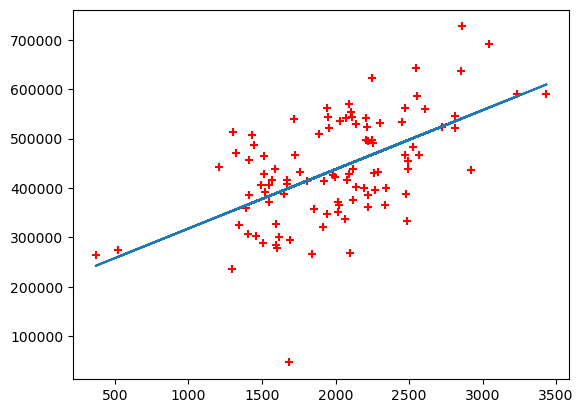

In [33]:
plt.scatter(X_size, y, color="red",marker="+")
plt.plot(new_X1, y_hat)